=== 📊 ts_tt 长度分布 ===
长度 1: 1 个样本
长度 2: 1 个样本
长度 3: 3 个样本
长度 5: 1 个样本
长度 6: 3 个样本
长度 7: 1 个样本
长度 8: 3 个样本
长度 9: 2 个样本
长度 10: 2 个样本
长度 11: 4 个样本
长度 12: 2 个样本
长度 13: 4 个样本
长度 14: 2 个样本
长度 15: 2 个样本
长度 16: 2 个样本
长度 18: 1 个样本
长度 19: 1 个样本
长度 22: 3 个样本
长度 24: 1 个样本
长度 25: 4 个样本
长度 26: 1 个样本
长度 27: 3 个样本
长度 28: 5 个样本
长度 29: 1 个样本
长度 30: 1 个样本
长度 31: 2 个样本
长度 32: 3 个样本
长度 33: 2 个样本
长度 34: 1 个样本
长度 35: 3 个样本
长度 36: 3 个样本
长度 37: 2 个样本
长度 38: 1 个样本
长度 39: 4 个样本
长度 40: 5 个样本
长度 41: 4 个样本
长度 42: 2 个样本
长度 43: 5 个样本
长度 44: 5 个样本
长度 45: 4 个样本
长度 46: 5 个样本
长度 47: 9 个样本
长度 48: 10 个样本
长度 49: 7 个样本
长度 50: 16 个样本
长度 51: 9 个样本
长度 52: 15 个样本
长度 53: 20 个样本
长度 54: 34 个样本
长度 55: 50 个样本
长度 56: 63 个样本
长度 57: 84 个样本
长度 58: 112 个样本
长度 59: 159 个样本
长度 60: 177 个样本
长度 61: 243 个样本
长度 62: 273 个样本
长度 63: 285 个样本
长度 64: 375 个样本
长度 65: 384 个样本
长度 66: 473 个样本
长度 67: 478 个样本
长度 68: 467 个样本
长度 69: 517 个样本
长度 70: 544 个样本
长度 71: 512 个样本
长度 72: 539 个样本
长度 73: 525 个样本
长度 74: 518 个样本
长度 75: 519 个样本
长度 76: 523 个样本
长度 77: 500 个样本
长度 

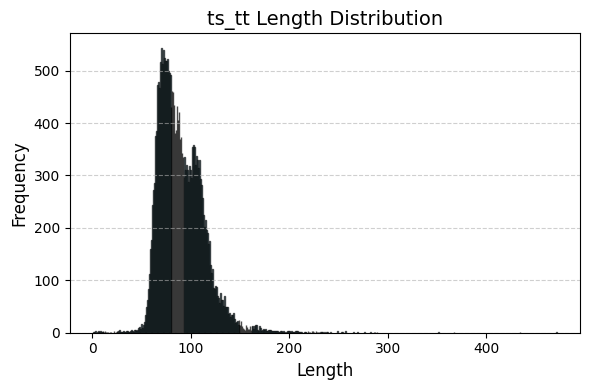

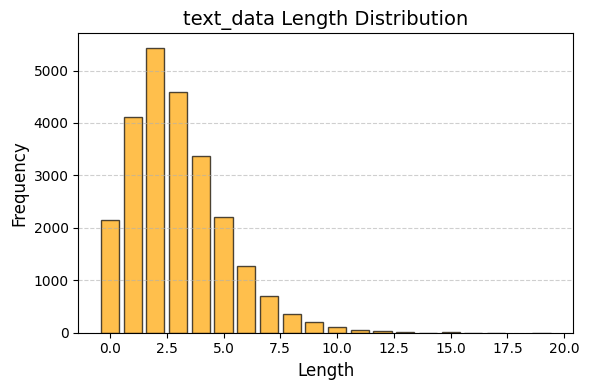

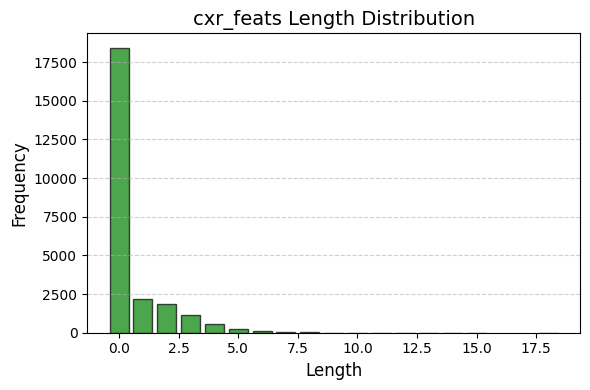

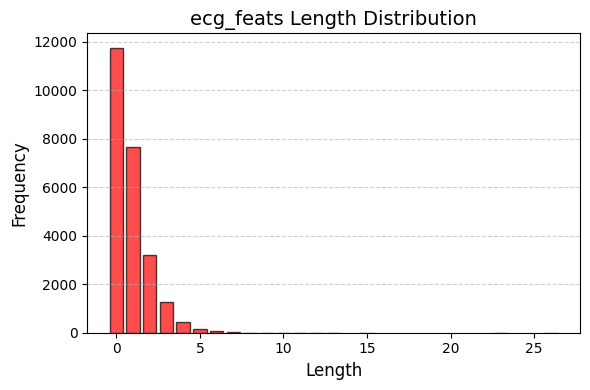

In [5]:
import pickle
from collections import Counter

# 1. 读取 pkl 数据
path = r"/playpen-shared/kechengli/workspace/dataset/mimiciv_pkl/train_ihm-48-cxr-notes-ecg-missingInd_stays.pkl"
with open(path, "rb") as f:
    data = pickle.load(f)

# 2. 统计每个字段的长度
ts_tt_lens = []
text_lens = []
cxr_lens = []
ecg_lens = []

for sample in data:
    ts_tt_lens.append(len(sample["ts_tt"]))
    text_lens.append(len(sample["text_data"]))
    cxr_lens.append(len(sample["cxr_feats"]))
    ecg_lens.append(len(sample["ecg_feats"]))

# 3. 用 Counter 统计频率
ts_tt_counter = Counter(ts_tt_lens)
text_counter = Counter(text_lens)
cxr_counter = Counter(cxr_lens)
ecg_counter = Counter(ecg_lens)

# 4. 打印结果
print("=== 📊 ts_tt 长度分布 ===")
for k, v in sorted(ts_tt_counter.items()):
    print(f"长度 {k}: {v} 个样本")

print("\n=== 📖 text_data 长度分布 ===")
for k, v in sorted(text_counter.items()):
    print(f"长度 {k}: {v} 个样本")

print("\n=== 🩻 cxr_feats 长度分布 ===")
for k, v in sorted(cxr_counter.items()):
    print(f"长度 {k}: {v} 个样本")

print("\n=== ❤️ ecg_feats 长度分布 ===")
for k, v in sorted(ecg_counter.items()):
    print(f"长度 {k}: {v} 个样本")

# 5. 可选：显示总样本数
print("\n总样本数：", len(data))
max_ts_tt_len = max(ts_tt_lens)
max_ts_tt_len = max(ts_tt_lens)
min_ts_tt_len = min(ts_tt_lens)
avg_ts_tt_len = sum(ts_tt_lens) / len(ts_tt_lens)

print("\n=== 📏 ts_tt 长度统计 ===")
print(f"最短长度: {min_ts_tt_len}")
print(f"最长长度: {max_ts_tt_len}")
print(f"平均长度: {avg_ts_tt_len:.2f}")

import matplotlib.pyplot as plt

# 假设你已经有下面这些 Counter：
# ts_tt_counter, text_counter, cxr_counter, ecg_counter

def plot_length_distribution(counter, title, color=None):
    lengths = sorted(counter.keys())
    freqs = [counter[k] for k in lengths]
    
    plt.figure(figsize=(6, 4))
    plt.bar(lengths, freqs, color=color, edgecolor="black", alpha=0.7)
    plt.title(f"{title} Length Distribution", fontsize=14)
    plt.xlabel("Length", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

# 绘制四个直方图
plot_length_distribution(ts_tt_counter, "ts_tt", color="skyblue")
plot_length_distribution(text_counter, "text_data", color="orange")
plot_length_distribution(cxr_counter, "cxr_feats", color="green")
plot_length_distribution(ecg_counter, "ecg_feats", color="red")



In [2]:
# %%
import pickle
import numpy as np
import torch
import os

# %%
# === Step 1: 指定文件路径 ===
file_path = r"/playpen-shared/kechengli/workspace/dataset/mimiciv_pkl/train_ihm-48-cxr-notes-ecg-missingInd_stays.pkl"

assert os.path.exists(file_path), f"❌ 文件不存在：{file_path}"
print(f"✅ 正在加载：{file_path}")

# %%
# === Step 2: 加载 pkl 文件 ===
with open(file_path, "rb") as f:
    data = pickle.load(f)

print(f"✅ 加载成功：共 {len(data)} 条样本，类型：{type(data)}")

# %%
# === Step 3: 查看前 N 条样本 ===
N = 1  # 可以改成 10
for i, sample in enumerate(data[:N]):
    print(f"\n================= 🩺 样本 {i+1}/{N} =================")
    if not isinstance(sample, dict):
        print(f"⚠️ 第 {i+1} 个不是字典，而是 {type(sample)}")
        continue

    for k, v in sample.items():
        # 尝试打印出每个字段的类型和形状
        if isinstance(v, (list, np.ndarray, torch.Tensor)):
            try:
                shape = np.array(v).shape
            except Exception:
                shape = "未知"
            print(f"{k:25s} | 类型: {type(v).__name__:10s} | 形状: {shape} | 示例: {str(v)[:10]}...")
            
        elif isinstance(v, dict):
            print(f"{k:25s} | 类型: dict (len={len(v)})")
        else:
            print(f"{k:25s} | 类型: {type(v).__name__:10s} | 值: {v}")




✅ 正在加载：/playpen-shared/kechengli/workspace/dataset/mimiciv_pkl/train_ihm-48-cxr-notes-ecg-missingInd_stays.pkl
✅ 加载成功：共 24590 条样本，类型：<class 'list'>

================= 🩺 样本 1/1 =================
name                      | 类型: int64      | 值: 16203923
hadm_id                   | 类型: int64      | 值: 22987622
stay_id                   | 类型: int        | 值: 38544470
ts_tt                     | 类型: ndarray    | 形状: (121,) | 示例: [0.15 0.16...
irg_ts                    | 类型: ndarray    | 形状: (121, 30) | 示例: [[0. 0. 0....
irg_ts_mask               | 类型: ndarray    | 形状: (121, 30) | 示例: [[0 0 0 .....
reg_ts                    | 类型: ndarray    | 形状: (49, 30) | 示例: [[ 0.00780...
text_data                 | 类型: list       | 形状: (4,) | 示例: ['EXAMINAT...
text_time_to_end          | 类型: ndarray    | 形状: (4,) | 示例: [3.5166666...
text_embeddings           | 类型: list       | 形状: (4, 768) | 示例: [array([ 4...
text_missing              | 类型: int        | 值: 0
cxr_feats                 | 类型: list       | 形状

In [9]:
# stats_pkl_shapes.py
import os, pickle, numpy as np, pandas as pd
from collections import Counter
from statistics import mean

PKL_PATH = r"/playpen-shared/kechengli/workspace/dataset/mimiciv_pkl/train_ihm-48-cxr-notes-ecg-missingInd_stays.pkl"
OUT_CSV  = "pkl_key_shape_summary.csv"

print(f"Loading: {PKL_PATH}")
with open(PKL_PATH, "rb") as f:
    data = pickle.load(f)
print(f"Total samples: {len(data)}; type: {type(data)}")

def np_shape(x):
    try:
        return tuple(x.shape)
    except Exception:
        return None

def summarize_key(dataset, key, probe_inner=5):
    """
    对单个 key 统计：
    - 值类型分布
    - 如果是 ndarray：shape 计数（top）、第一维长度分布
    - 如果是 list：长度分布，以及 list 内部元素的类型/shape（抽样）
    - 标量示例
    """
    types = Counter()
    array_shapes = Counter()
    first_dim_lengths = []
    inner_types = Counter()
    inner_shapes = Counter()
    examples = []

    for sample in dataset:
        if key not in sample:
            types["<missing-key>"] += 1
            continue
        val = sample[key]
        types[type(val).__name__] += 1

        if isinstance(val, np.ndarray):
            s = np_shape(val)
            array_shapes[s] += 1
            if s and len(s) > 0:
                first_dim_lengths.append(s[0])
        elif isinstance(val, list):
            first_dim_lengths.append(len(val))
            # 抽样 list 里前几个元素，看看内部元素类型和形状
            for inner in val[:probe_inner]:
                inner_types[type(inner).__name__] += 1
                if isinstance(inner, np.ndarray):
                    inner_shapes[np_shape(inner)] += 1
        else:
            # 标量类：收集少量示例
            if len(examples) < 3:
                examples.append(val)

    row = {
        "types": dict(types) if types else None,
        "array_shapes_counts(top)": dict(array_shapes.most_common(8)) if array_shapes else None,
        "len_min": int(np.min(first_dim_lengths)) if first_dim_lengths else None,
        "len_max": int(np.max(first_dim_lengths)) if first_dim_lengths else None,
        "len_mean": float(np.mean(first_dim_lengths)) if first_dim_lengths else None,
        "len_p90": float(np.percentile(first_dim_lengths, 90)) if first_dim_lengths else None,
        "len_p95": float(np.percentile(first_dim_lengths, 95)) if first_dim_lengths else None,
        "len_p99": float(np.percentile(first_dim_lengths, 99)) if first_dim_lengths else None,
        "inner_types(sampled)": dict(inner_types) if inner_types else None,
        "inner_shapes_counts(sampled top)": dict(inner_shapes.most_common(8)) if inner_shapes else None,
        "examples": examples if examples else None,
    }
    return row

# 收集所有 key（从全部样本或前若干样本）
all_keys = set()
for s in data[:2000] if isinstance(data, list) else data:
    all_keys.update(s.keys())
all_keys = sorted(all_keys)

rows = []
for k in all_keys:
    stats = summarize_key(data, k)  # 如果太慢，可把 data 换成 data[:N] 先抽样
    rows.append({"key": k, **stats})

df = pd.DataFrame(rows).sort_values("key").reset_index(drop=True)
 

# 也在控制台简要打印一版，便于快速查看
for k in all_keys:
    r = df[df["key"] == k].iloc[0]
    print(f"\n=== {k} ===")
    print("types:", r["types"])
    if pd.notna(r["array_shapes_counts(top)"]):
        print("array_shapes_counts(top):", r["array_shapes_counts(top)"])
    if pd.notna(r["len_min"]):
        print(f"len stats: min={r['len_min']}  max={r['len_max']}  mean={r['len_mean']:.2f}  p95={r['len_p95']:.2f}")
    if pd.notna(r["inner_shapes_counts(sampled top)"]):
        print("inner_shapes_counts(sampled top):", r["inner_shapes_counts(sampled top)"])


Loading: /playpen-shared/kechengli/workspace/dataset/mimiciv_pkl/train_ihm-48-cxr-notes-ecg-missingInd_stays.pkl
Total samples: 24590; type: <class 'list'>

=== cxr_feats ===
types: {'list': 24590}
len stats: min=0.0  max=18.0  mean=0.57  p95=3.00
inner_shapes_counts(sampled top): {(1024,): 13617}

=== cxr_missing ===
types: {'int': 24590}

=== cxr_time ===
types: {'list': 18442, 'ndarray': 6148}
array_shapes_counts(top): {(1,): 2188, (2,): 1845, (3,): 1149, (4,): 538, (5,): 234, (6,): 110, (7,): 39, (8,): 18}
len stats: min=0.0  max=18.0  mean=0.57  p95=3.00

=== ecg_feats ===
types: {'list': 24590}
len stats: min=0.0  max=26.0  mean=0.86  p95=3.00
inner_shapes_counts(sampled top): {(256,): 20967}

=== ecg_missing ===
types: {'int': 24590}

=== ecg_time ===
types: {'ndarray': 12833, 'list': 11757}
array_shapes_counts(top): {(1,): 7649, (2,): 3207, (3,): 1261, (4,): 459, (5,): 149, (6,): 57, (7,): 31, (8,): 6}
len stats: min=0.0  max=26.0  mean=0.86  p95=3.00

=== hadm_id ===
types: {'

In [10]:
import pickle

file_path = r"E:\Timeseries\dataset\mimiciv_pkl\train_ihm-48-cxr-notes-ecg_stays.pkl"

with open(file_path, "rb") as f:
    data = pickle.load(f)

print(f"✅ 加载成功，共 {len(data)} 个样本")

# 初始化计数器
missing_counts = {
    "text_missing": 0,
    "cxr_missing": 0,
    "ecg_missing": 0,
}

# 遍历每个样本
for sample in data:
    for key in missing_counts.keys():
        if key in sample and sample[key] != 0:
            missing_counts[key] += 1

# 输出统计结果
print("\n📊 缺失情况统计：")
for key, count in missing_counts.items():
    rate = count / len(data) * 100
    print(f"{key:15s}: {count:5d} / {len(data)}  ({rate:.2f}%)")

# 判断是否完全无缺失
if all(v == 0 for v in missing_counts.values()):
    print("\n✅ 结论：所有样本的 text/cxr/ecg 模态均完整，无缺失。")
else:
    print("\n⚠️ 存在模态缺失样本，上表给出了比例。")


✅ 加载成功，共 3624 个样本

📊 缺失情况统计：
text_missing   :     0 / 3624  (0.00%)
cxr_missing    :     0 / 3624  (0.00%)
ecg_missing    :     0 / 3624  (0.00%)

✅ 结论：所有样本的 text/cxr/ecg 模态均完整，无缺失。


In [7]:
import pickle
import numpy as np
import torch
import os

# %%
# === Step 1: 指定文件路径 ===
file_path = r"/playpen-shared/kechengli/workspace/dataset/mimiciv_after_diff_fuse_1/test_ihm-48-cxr-notes-ecg-missingInd_stays.pkl"

assert os.path.exists(file_path), f"❌ 文件不存在：{file_path}"
print(f"✅ 正在加载：{file_path}")

# %%
# === Step 2: 加载 pkl 文件 ===
with open(file_path, "rb") as f:
    data = pickle.load(f)

print(f"✅ 加载成功：共 {len(data)} 条样本，类型：{type(data)}")

# %%
# === Step 3: 查看前 N 条样本 ===
N = 1  # 可以改成 10
for i, sample in enumerate(data[:N]):
    print(f"\n================= 🩺 样本 {i+1}/{N} =================")
    if not isinstance(sample, dict):
        print(f"⚠️ 第 {i+1} 个不是字典，而是 {type(sample)}")
        continue

    for k, v in sample.items():
        # 尝试打印出每个字段的类型和形状
        if isinstance(v, (list, np.ndarray, torch.Tensor)):
            try:
                shape = np.array(v).shape
            except Exception:
                shape = "未知"
            print(f"{k:25s} | 类型: {type(v).__name__:10s} | 形状: {shape} | 示例: {str(v)}")
        elif isinstance(v, dict):
            print(f"{k:25s} | 类型: dict (len={len(v)})")
        else:
            print(f"{k:25s} | 类型: {type(v).__name__:10s} | 值: {v}")


✅ 正在加载：/playpen-shared/kechengli/workspace/dataset/mimiciv_after_diff_fuse_1/test_ihm-48-cxr-notes-ecg-missingInd_stays.pkl
✅ 加载成功：共 5269 条样本，类型：<class 'list'>

================= 🩺 样本 1/1 =================
name                      | 类型: int64      | 值: 15765554
hadm_id                   | 类型: int64      | 值: 24802579
stay_id                   | 类型: int        | 值: 38466097
ts_tt                     | 类型: ndarray    | 形状: (81,) | 示例: [1.1594444444444445 1.1927777777777777 1.2927777777777778
 1.326111111111111 1.6094444444444445 1.7927777777777778
 1.8094444444444444 2.176111111111111 2.8094444444444444
 3.8094444444444444 4.809444444444445 5.809444444444445 6.809444444444445
 6.876111111111111 7.276111111111111 7.809444444444445 8.809444444444445
 9.809444444444445 10.809444444444445 11.809444444444445
 12.809444444444445 13.426111111111112 13.809444444444445
 14.809444444444445 15.809444444444445 16.809444444444445
 17.809444444444445 18.809444444444445 19.809444444444445
 20.80944444

In [8]:
import os
import pickle

# === Step 1: 指定三个文件路径（只改这里就行） ===
base_dir = r"/playpen-shared/kechengli/workspace/dataset/mimiciv_pkl"
prefixes = ["train", "val", "test"]
suffix = "ihm-48-cxr-notes-ecg-missingInd_stays.pkl"

# === Step 2: 遍历统计 ===
total_count = 0
file_counts = {}

for p in prefixes:
    file_path = os.path.join(base_dir, f"{p}_{suffix}")
    if not os.path.exists(file_path):
        print(f"❌ 文件不存在：{file_path}")
        continue

    with open(file_path, "rb") as f:
        data = pickle.load(f)

    count = len(data)
    file_counts[p] = count
    total_count += count
    print(f"✅ {p:<5s} 文件加载成功，共 {count} 条样本")

# === Step 3: 输出总和 ===
print("\n================= 📊 数据统计 =================")
for p, c in file_counts.items():
    print(f"{p:<5s} 集样本数：{c}")
print(f"---------------------------------------------")
print(f"✅ 样本总数：{total_count}")


✅ train 文件加载成功，共 24590 条样本
✅ val   文件加载成功，共 5270 条样本
✅ test  文件加载成功，共 5269 条样本

================= 📊 数据统计 =================
train 集样本数：24590
val   集样本数：5270
test  集样本数：5269
---------------------------------------------
✅ 样本总数：35129


In [11]:
import pickle

file_path = r"E:\Timeseries\dataset\mimiciv_pkl\train_ihm-48-cxr-notes-ecg-missingInd_stays.pkl"

with open(file_path, "rb") as f:
    data = pickle.load(f)

print(f"✅ 加载成功，共 {len(data)} 个样本")

# 初始化计数器
missing_counts = {
    "text_missing": 0,
    "cxr_missing": 0,
    "ecg_missing": 0,
}

# 遍历每个样本
for sample in data:
    for key in missing_counts.keys():
        if key in sample and sample[key] != 0:
            missing_counts[key] += 1

# 输出统计结果
print("\n📊 缺失情况统计：")
for key, count in missing_counts.items():
    rate = count / len(data) * 100
    print(f"{key:15s}: {count:5d} / {len(data)}  ({rate:.2f}%)")

# 判断是否完全无缺失
if all(v == 0 for v in missing_counts.values()):
    print("\n✅ 结论：所有样本的 text/cxr/ecg 模态均完整，无缺失。")
else:
    print("\n⚠️ 存在模态缺失样本，上表给出了比例。")


✅ 加载成功，共 24590 个样本

📊 缺失情况统计：
text_missing   :  2159 / 24590  (8.78%)
cxr_missing    : 18442 / 24590  (75.00%)
ecg_missing    : 11757 / 24590  (47.81%)

⚠️ 存在模态缺失样本，上表给出了比例。


In [1]:
import pickle
import pandas as pd
import numpy as np
import os

# === 修改为你的路径 ===
pkl_path = r"/playpen-shared/kechengli/workspace/dataset/mimiciv_pkl/train_ihm-48-cxr-notes-ecg-missingInd_stays.pkl"
output_dir = r"/playpen-shared/kechengli/workspace/dataset/d"
os.makedirs(output_dir, exist_ok=True)

# === 加载数据 ===
with open(pkl_path, "rb") as f:
    data = pickle.load(f)

print(f"✅ 加载成功：共 {len(data)} 条样本")

# === 导出前 3 条样本 ===
for i in range(3):
    sample = data[i]
    print(f"\n===== 🩺 样本 {i+1}/{3} =====")
    name = sample.get('hadm_id', f'sample_{i}')
    
    ts_tt = np.array(sample['ts_tt'])
    irg_ts = np.array(sample['irg_ts'])
    irg_ts_mask = np.array(sample['irg_ts_mask'])
    reg_ts = np.array(sample['reg_ts'])
    
    # 确保形状一致
    assert irg_ts.shape[0] == len(ts_tt), "irg_ts 时间步数与 ts_tt 不一致"
    
    # === 保存 irg_ts + mask + ts_tt 到 CSV ===
    df_irregular = pd.DataFrame(irg_ts, columns=[f"var_{j}" for j in range(irg_ts.shape[1])])
    df_irregular['time_tt'] = ts_tt
    df_irregular = df_irregular[[ 'time_tt'] + [f"var_{j}" for j in range(irg_ts.shape[1])]]
    
    df_mask = pd.DataFrame(irg_ts_mask, columns=[f"mask_{j}" for j in range(irg_ts_mask.shape[1])])
    df_mask['time_tt'] = ts_tt
    df_mask = df_mask[[ 'time_tt'] + [f"mask_{j}" for j in range(irg_ts_mask.shape[1])]]
    
    df_regular = pd.DataFrame(reg_ts, columns=[f"var_{j}" for j in range(reg_ts.shape[1])])
    df_regular['time_idx'] = np.arange(reg_ts.shape[0])
    df_regular = df_regular[[ 'time_idx'] + [f"var_{j}" for j in range(reg_ts.shape[1])]]
    
    # === 保存为 CSV 文件 ===
    df_irregular.to_csv(os.path.join(output_dir, f"{name}_irg_ts.csv"), index=False)
    df_mask.to_csv(os.path.join(output_dir, f"{name}_irg_ts_mask.csv"), index=False)
    df_regular.to_csv(os.path.join(output_dir, f"{name}_reg_ts.csv"), index=False)
    
    print(f"✅ 导出完成：{name}")
    print(f" - 不规则时间序列: {df_irregular.shape} → {name}_irg_ts.csv")
    print(f" - 缺失掩码: {df_mask.shape} → {name}_irg_ts_mask.csv")
    print(f" - 规则化时间序列: {df_regular.shape} → {name}_reg_ts.csv")


✅ 加载成功：共 24590 条样本

===== 🩺 样本 1/3 =====
✅ 导出完成：22987622
 - 不规则时间序列: (121, 31) → 22987622_irg_ts.csv
 - 缺失掩码: (121, 31) → 22987622_irg_ts_mask.csv
 - 规则化时间序列: (49, 31) → 22987622_reg_ts.csv

===== 🩺 样本 2/3 =====
✅ 导出完成：29083442
 - 不规则时间序列: (65, 31) → 29083442_irg_ts.csv
 - 缺失掩码: (65, 31) → 29083442_irg_ts_mask.csv
 - 规则化时间序列: (49, 31) → 29083442_reg_ts.csv

===== 🩺 样本 3/3 =====
✅ 导出完成：27382550
 - 不规则时间序列: (91, 31) → 27382550_irg_ts.csv
 - 缺失掩码: (91, 31) → 27382550_irg_ts_mask.csv
 - 规则化时间序列: (49, 31) → 27382550_reg_ts.csv


In [8]:

import pickle
import os

filepath = "/playpen-shared/kechengli/workspace/Fusemoe/FuseMoE/src/run/TS6/ihm-48-cxr-notes-ecg/TS/TS_48/Atten/layer3/batch/irregular_TS_64/regular_Text/0.0004_8_8_128_1_1_512/"
with open(os.path.join(filepath, 'result.pkl'), 'rb') as f:
    result = pickle.load(f)

print(result)

{42: {'auc': {'val': 0.8025576275576275, 'test': 0.7921071481499777}, 'auprc': {'val': 0.38917577098172335, 'test': 0.41702712858768193}, 'f1': {'val': 0.38775510204081626, 'test': 0.3730569948186528}}}


In [2]:
# convert_csdi_pickles_to_py38.py
import os
import sys
import pickle
import types
import numpy as np
import importlib

# --- 关键：安装 numpy2 → numpy1 的 pickle 兼容补丁 ---
import sys
import types
import numpy as np

def install_numpy2_pickle_shim():
    """
    在当前 Python 进程里伪造 numpy 2.x 的模块路径结构：
    - numpy._core           （包）
    - numpy._core.<submod>  映射到 numpy.core.<submod>
    这样可以在 numpy 1.x 环境里反序列化 numpy 2.x 生成的 pickle。
    """
    # 如果已经装过就不重复
    if any(name.startswith("numpy._core.numeric") for name in sys.modules):
        return

    # 1) 创建 numpy._core 包
    core_pkg_name = "numpy._core"
    core_pkg = sys.modules.get(core_pkg_name)
    if core_pkg is None:
        core_pkg = types.ModuleType(core_pkg_name)
        core_pkg.__path__ = []      # 标记为包
        sys.modules[core_pkg_name] = core_pkg

    # 2) 映射常见子模块
    submodules = [
        "multiarray",
        "_multiarray_umath",
        "numeric",
        "numerictypes",
        "umath",
        "fromnumeric",
        "function_base",
        "shape_base",
        "getlimits",
        "machar",
    ]

    for name in submodules:
        full_old = f"numpy._core.{name}"
        full_new = f"numpy.core.{name}"
        if full_old in sys.modules:
            continue
        try:
            real_mod = importlib.import_module(full_new)
        except ImportError:
            # 某些 numpy 版本可能没有某个子模块，忽略就行
            continue

        # 把真实模块挂到假的路径上
        sys.modules[full_old] = real_mod
        # 同时作为 numpy._core 的属性
        setattr(core_pkg, name, real_mod)


def convert_one(src_path, dst_path):
    print(f"[LOAD ] {src_path}")
    install_numpy2_pickle_shim()  # 先装补丁，再读

    with open(src_path, "rb") as f:
        obj = pickle.load(f)

    os.makedirs(os.path.dirname(dst_path), exist_ok=True)
    # 用 protocol=4 存，确保 Py3.8/3.9 + numpy1.x 兼容
    with open(dst_path, "wb") as f:
        pickle.dump(obj, f, protocol=4)

    print(f"[SAVE ] {dst_path}  (protocol=4)")


def main():
    in_dir  = "/playpen-shared/kechengli/workspace/dataset/mimic_after_diff_csdi_2"
    out_dir = "/playpen-shared/kechengli/workspace/dataset/mimiciv_after_diff_fuse_2"

    files = [
        "train_ihm-48-cxr-notes-ecg-missingInd_stays.pkl",
        "val_ihm-48-cxr-notes-ecg-missingInd_stays.pkl",
        "test_ihm-48-cxr-notes-ecg-missingInd_stays.pkl",
    ]

    for fname in files:
        src = os.path.join(in_dir, fname)
        dst = os.path.join(out_dir, fname)
        convert_one(src, dst)

    print("\nAll done. Now use the files in:", out_dir)



main()


[LOAD ] /playpen-shared/kechengli/workspace/dataset/mimic_after_diff_csdi_2/train_ihm-48-cxr-notes-ecg-missingInd_stays.pkl
[SAVE ] /playpen-shared/kechengli/workspace/dataset/mimiciv_after_diff_fuse_2/train_ihm-48-cxr-notes-ecg-missingInd_stays.pkl  (protocol=4)
[LOAD ] /playpen-shared/kechengli/workspace/dataset/mimic_after_diff_csdi_2/val_ihm-48-cxr-notes-ecg-missingInd_stays.pkl
[SAVE ] /playpen-shared/kechengli/workspace/dataset/mimiciv_after_diff_fuse_2/val_ihm-48-cxr-notes-ecg-missingInd_stays.pkl  (protocol=4)
[LOAD ] /playpen-shared/kechengli/workspace/dataset/mimic_after_diff_csdi_2/test_ihm-48-cxr-notes-ecg-missingInd_stays.pkl
[SAVE ] /playpen-shared/kechengli/workspace/dataset/mimiciv_after_diff_fuse_2/test_ihm-48-cxr-notes-ecg-missingInd_stays.pkl  (protocol=4)

All done. Now use the files in: /playpen-shared/kechengli/workspace/dataset/mimiciv_after_diff_fuse_2
